# UW Data 558 Polished Code Release - Daniel White
## Comparison with Sklearn

### Introduction

In this notebook, I compare the model computed using my own Logistic Regression algorithm with the one computed by sklearn. The two methods are compared using the Spam dataset introduced in Demo 1.

In [44]:
#Change ipython notebook output settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Import packages required packages
import src.LogisticRegression as mlr
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression


In [45]:
# Load the Spam dataset, drop NA
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.data', delim_whitespace=True, header =None)
spam = data.dropna()

#Replace 0s with -1 in final column
spam[57].replace(0,-1,inplace=True)

#Split into training and test set and standardize data using the sklearn functions

# Create training and test sets for X and Y variables
X = spam.drop(57, axis=1)
y = spam.iloc[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Standardize the data using SKlearn processing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Append a column of 1's to X_train and X_test to represent the model intercept coefficient
X_train = preprocessing.add_dummy_feature(X_train) 
X_test = preprocessing.add_dummy_feature(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In the code block below, the sklearn model and my own model for Logistic Regression are fitted to the Spam dataset. The coefficients of each model are then compared on a scatterplot.

In [46]:
np.random.seed(9)
n,d = X_train.shape
eps = 0.001
max_iter = 1000
lamb = 1
t_init = lr.compute_t(X_train, lamb=lamb)
beta_in = np.random.normal(size=d)
mlr_training = lr.my_logistic_regression(beta_in, X=X_train, Y=y_train, t_init = t_init, eps= eps, max_iter = max_iter, lamb=lamb)
mlr_model = mlr_training[-1]

#Fit sklearn Logistic Regression with appropriately transformed lambda parameter
logreg = LogisticRegression(C = 1/(2*n*lamb), fit_intercept = True)
logregfit = logreg.fit(X_train, y_train);
#Save coefficients from fitted Logistic Regression from sklearn
sklearn_model = logreg.coef_.T

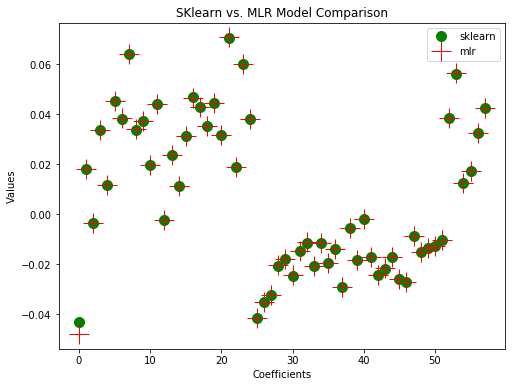

In [47]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (8,6))
f = plt.plot(sklearn_model, ".", color = "green", ms =20)
f = plt.plot(mlr_model, "+", color = "red", ms = 20)
plt.legend(['sklearn', 'mlr'], loc='upper right')
plt.title("SKlearn vs. MLR Model Comparison")
plt.xlabel("Coefficients")
plt.ylabel("Values")
plt.show();

In the scatterplot above, the X axis representes the coefficient number and the Y axis represents the value. The two models developed using my own algorithm and sklearn are overlayed on the plot and compared. The sklearn model coefficients are represented by green dots while my logisitic regression model is represented by the red crosses. The plot shows near universal overlap with the coefficients from both models, demonstrating that the two are very similar.

In [48]:
train_misclass = lr.class_error(X_train.dot(sklearn_model), y_train)
print("SKlearn model - Training Misclass Error:", train_misclass)
test_misclass = lr.class_error(X_test.dot(sklearn_model), y_test)
print("SKlearn model - Test Misclass Error:", test_misclass)

SKlearn model - Training Misclass Error: 0.10231884058
SKlearn model - Test Misclass Error: 0.112945264987


In [49]:
train_misclass = lr.class_error(X_train.dot(mlr_model), y_train)
print("MLR model - Training Misclass Error:", train_misclass)
test_misclass = lr.class_error(X_test.dot(mlr_model), y_test)
print("MLR model - Test Misclass Error:", test_misclass)

MLR model - Training Misclass Error: 0.10347826087
MLR model - Test Misclass Error: 0.111207645526


The misclassification error for the two models is computed above. As the output shows, the error rate for the sklearn model and my own MLR model is nearly identical.